<a href="https://colab.research.google.com/github/iu-data-science-python-i590/final-project-team-python-trio/blob/master/Phase1/final_project_phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import Libraries

## Analysis of K-means Clustering on Wisconsin Breast Cancer Data

Phase 1.0 | 2018 October 24

Bill Screen, Ha-Lan Nguyen, Tarun Rawat | Indiana University | M.S. Data Science

#### PROBLEM STATEMENT: 
Breast cancer is a rising issue among women. A cancer’s stage is a crucial factor in deciding what treatment options to recommend, and in determining the patient’s prognosis. Today, in the United States, approximately one in eight women over their lifetime has a risk of developing breast cancer. An analysis of the most recent data has shown that the survival rate is 88% after 5 years of diagnosis and 80% after 10 years of diagnosis. With early detection and treatment, it is possible that this type of cancer will go into remission. In such a case, the worse fear of a cancer patient is the recurrence of the cancer.

#### OBJECTIVE: 
This report will demonstrate how implementing a "k-means" algorithm can be used to classify benign and malign cells in two different groups.

#### PHASE 1 TASKS

- Download the data and load it in Python
- Add Headers (Scn A2 A3 A4 A5 A6 A7 A8 A9 A10 CLASS)
- Impute missing values 
- Plot basic graphs
- Compute data statistics
---

In [0]:
# Import Libraries
# %matplotlib inline
import pandas as pd
# import pylab as plt
import matplotlib.pyplot as plt
import numpy as np
import statistics

#### Load Data

In [0]:
# Set header column names
column_names = ['Scn','A2','A3','A4','A5','A6','A7','A8','A9','A10','CLASS']

# Load data file into pandas Dataframe
df = pd.read_csv('breast-cancer-wisconsin.data', names=column_names)

# Inspect data
print(df.head(n=120))

#### Impute missing values

In [0]:
# Set NA character
na_value_char = '?' 

# Replace ? by NaN in column A7
df['A7'].replace(na_value_char, value=np.NaN, inplace=True)

# Convert column A7 back to numeric
df['A7'] = pd.to_numeric(df['A7'])

# Check the number of NaN values in the DataFrame
print('\n Column A7 contains {0} NaN rows'.format(df['A7'].isnull().sum()))

# Replace NaN values with the mean of column A7 to the entire DataFrame
df.fillna((df.mean(skipna=True)), inplace=True)

# Convert all columns of DataFrame
df = df.apply(pd.to_numeric)

#### Explore Dataset

In [12]:
# Provide the summary statistics using the describe() function
print('\nDataFrame Summary Statistics:')
print(df.describe())

# Find number of columns and number of rows
print('\nThe Dataframe has {0} rows, and {1} columns'.format(df.shape[0], df.shape[1]))

# Report how many unique values in each column
for column in column_names:
  print('\nColumn {0} has {1} unique values.'.format(column, len(df[column].unique())))


DataFrame Summary Statistics:
                Scn          A2          A3          A4          A5  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

               A6          A7          A8          A9         A10       CLASS  
count  699.000000  699.000000  699.000000  699.000000  699.000000  699.000000  
mean     3.216023    3.544656    3.437768    2.866953    1.589413    2.689557  
std      2.214300    3.601852    2.438364    3.053634    1.715078    0.951273  
min      

####Compute data statistics

In [0]:
# Find the mean, median, standard deviation and variance of each of the attributes A2 to A10.

# Set column headers
column_headers = ['','Mean','Median','Std. Deviation']

# Create array of row data
row_data = []

# Iterate over dataset and append column statitics to array
for column in column_names[column_names.index('A2') : column_names.index('A10') + 1]:
  row_data.append([column, df[column].mean(), df[column].median(), df[column].std(ddof=0)])

# Convert array to DataFrame
stats_df = pd.DataFrame(row_data, columns=column_headers)

# Display results
print(stats_df)

#### Plot basic graphs

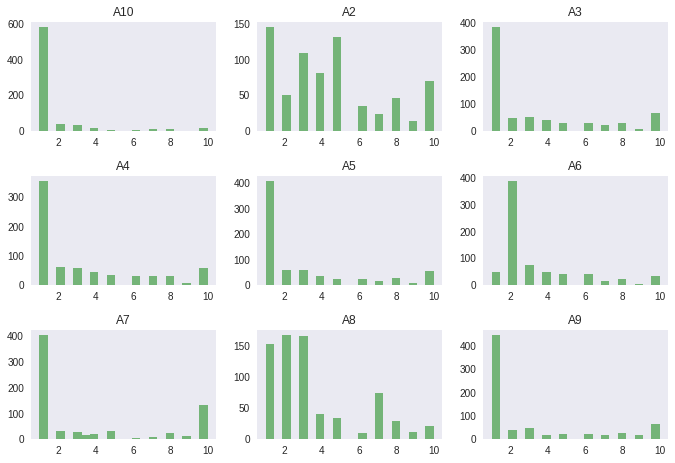

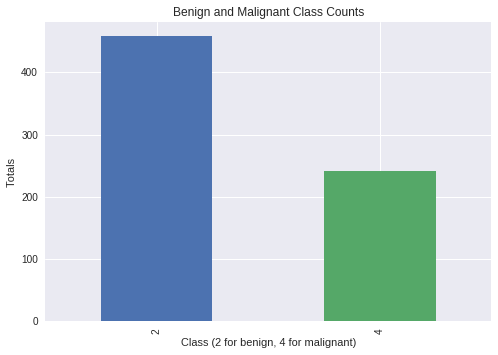

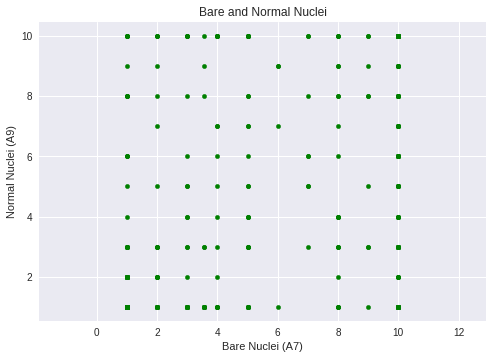

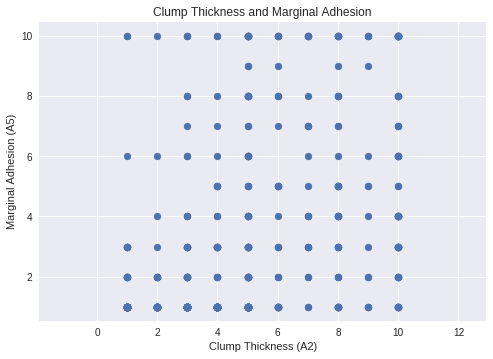

The P-Value of Scn and Scn is: 0.0
The Corr value of Scn and Scn is: 1.0
The P-Value of Scn and A2 is: 0.14407599019249967
The Corr value of Scn and A2 is: -0.055308442271622085
The P-Value of Scn and A3 is: 0.27201178847672114
The Corr value of Scn and A3 is: -0.041603340104323525
The P-Value of Scn and A4 is: 0.2723264420394661
The Corr value of Scn and A4 is: -0.041576069156014986
The P-Value of Scn and A5 is: 0.08652463838870028
The Corr value of Scn and A5 is: -0.06487807837000635
The P-Value of Scn and A6 is: 0.2292963524017535
The Corr value of Scn and A6 is: -0.04552827783282187
The P-Value of Scn and A7 is: 0.009045157410524234
The Corr value of Scn and A7 is: -0.09866780379310536
The P-Value of Scn and A8 is: 0.11268426133600587
The Corr value of Scn and A8 is: -0.0600505326950809
The P-Value of Scn and A9 is: 0.1690759509997611
The Corr value of Scn and A9 is: -0.05207195187406186
The P-Value of Scn and A10 is: 0.3568655374370404
The Corr value of Scn and A10 is: -0.03490066

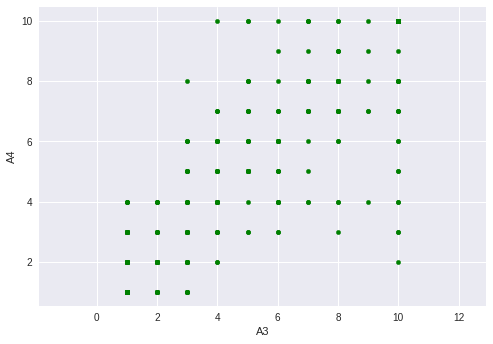

The P-Value of A3 and A5 is: 2.3591608331494555e-106
The Corr value of A3 and A5 is: 0.7055818115571124
The P-Value of A3 and A6 is: 3.5222494191442436e-128
The Corr value of A3 and A6 is: 0.7517991298771312


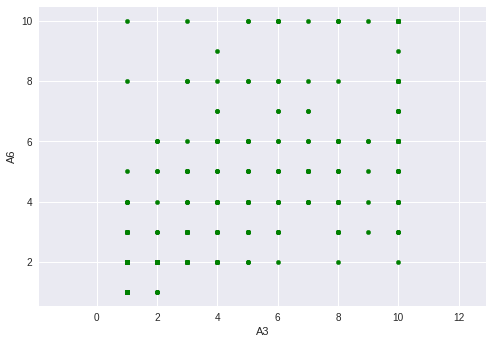

The P-Value of A3 and A7 is: 1.1684803669183675e-98
The Corr value of A3 and A7 is: 0.6868014361715671
The P-Value of A3 and A8 is: 2.967643454111043e-130
The Corr value of A3 and A8 is: 0.755720981100574


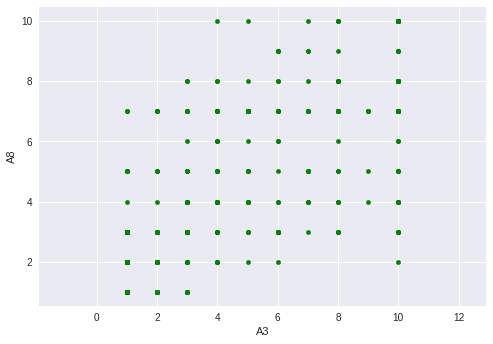

The P-Value of A3 and A9 is: 5.396741131519736e-114
The Corr value of A3 and A9 is: 0.722864821906358
The P-Value of A3 and A10 is: 1.1557046806059684e-37
The Corr value of A3 and A10 is: 0.45869314741651
The P-Value of A3 and CLASS is: 1.74792449990722e-169
The Corr value of A3 and CLASS is: 0.8179037353075594


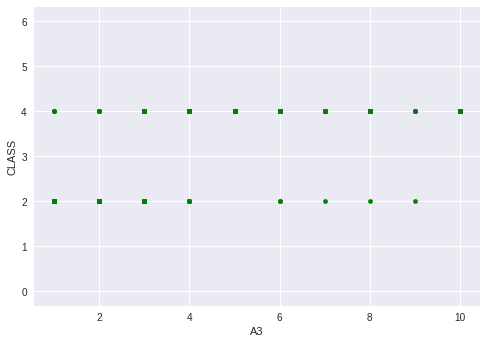

The P-Value of A4 and Scn is: 0.2723264420394661
The Corr value of A4 and Scn is: -0.041576069156014986
The P-Value of A4 and A2 is: 9.705346399821006e-87
The Corr value of A4 and A2 is: 0.6545890800019242
The P-Value of A4 and A3 is: 8.388647422518441e-264
The Corr value of A4 and A3 is: 0.9068819130525946


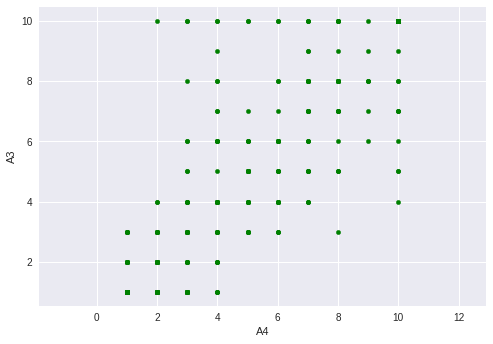

The P-Value of A4 and A4 is: 0.0
The Corr value of A4 and A4 is: 1.0
The P-Value of A4 and A5 is: 3.3401053031710024e-97
The Corr value of A4 and A5 is: 0.6830792002304757
The P-Value of A4 and A6 is: 1.5439578218784122e-112
The Corr value of A4 and A6 is: 0.7196684371703589
The P-Value of A4 and A7 is: 4.406504001246268e-108
The Corr value of A4 and A7 is: 0.7096057825880115
The P-Value of A4 and A8 is: 3.54729196632069e-120
The Corr value of A4 and A8 is: 0.7359484540232973
The P-Value of A4 and A9 is: 1.945780906902607e-112
The Corr value of A4 and A9 is: 0.7194463169532811
The P-Value of A4 and A10 is: 2.8030388314439526e-34
The Corr value of A4 and A10 is: 0.4389109289282089
The P-Value of A4 and CLASS is: 2.9456211578465458e-170
The Corr value of A4 and CLASS is: 0.8189337394205257


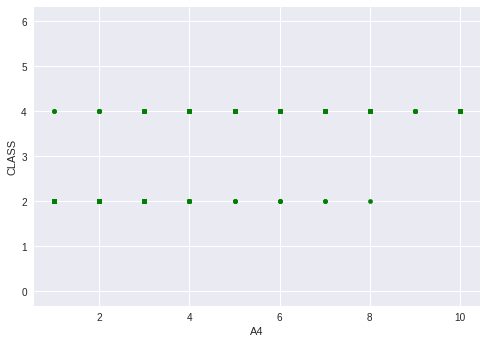

The P-Value of A5 and Scn is: 0.08652463838870028
The Corr value of A5 and Scn is: -0.06487807837000635
The P-Value of A5 and A2 is: 8.745347325210674e-43
The Corr value of A5 and A2 is: 0.48635624367670227
The P-Value of A5 and A3 is: 2.3591608331494555e-106
The Corr value of A5 and A3 is: 0.7055818115571124
The P-Value of A5 and A4 is: 3.3401053031710024e-97
The Corr value of A5 and A4 is: 0.6830792002304757
The P-Value of A5 and A5 is: 0.0
The Corr value of A5 and A5 is: 1.0
The P-Value of A5 and A6 is: 1.8562023780663013e-69
The Corr value of A5 and A6 is: 0.5995990684254991
The P-Value of A5 and A7 is: 1.9044255206142787e-90
The Corr value of A5 and A7 is: 0.6650491713352075
The P-Value of A5 and A8 is: 4.7348851617234485e-91
The Corr value of A5 and A8 is: 0.6667153262640533
The P-Value of A5 and A9 is: 1.567472150235757e-70
The Corr value of A5 and A9 is: 0.603352412216761
The P-Value of A5 and A10 is: 7.040012706414249e-31
The Corr value of A5 and A10 is: 0.4176327800568862
The

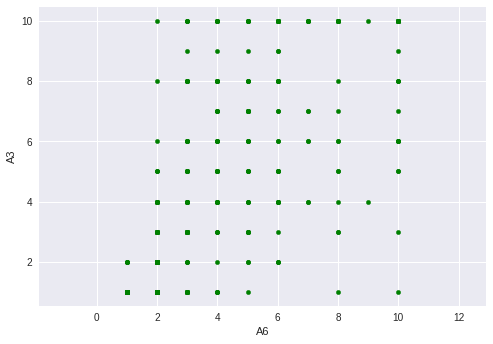

The P-Value of A6 and A4 is: 1.5439578218784122e-112
The Corr value of A6 and A4 is: 0.7196684371703589
The P-Value of A6 and A5 is: 1.8562023780663013e-69
The Corr value of A6 and A5 is: 0.5995990684254991
The P-Value of A6 and A6 is: 0.0
The Corr value of A6 and A6 is: 1.0
The P-Value of A6 and A7 is: 2.063183291122933e-64
The Corr value of A6 and A7 is: 0.5812612595200386
The P-Value of A6 and A8 is: 2.7551337572423012e-74
The Corr value of A6 and A8 is: 0.616101840871849
The P-Value of A6 and A9 is: 3.158942080735435e-78
The Corr value of A6 and A9 is: 0.6288806855890917
The P-Value of A6 and A10 is: 2.1401120575711673e-41
The Corr value of A6 and A10 is: 0.4791014770347479
The P-Value of A6 and CLASS is: 4.346160495522158e-97
The Corr value of A6 and CLASS is: 0.682784530093866
The P-Value of A7 and Scn is: 0.009045157410524234
The Corr value of A7 and Scn is: -0.09866780379310536
The P-Value of A7 and A2 is: 4.880714267675015e-66
The Corr value of A7 and A2 is: 0.587299749997609


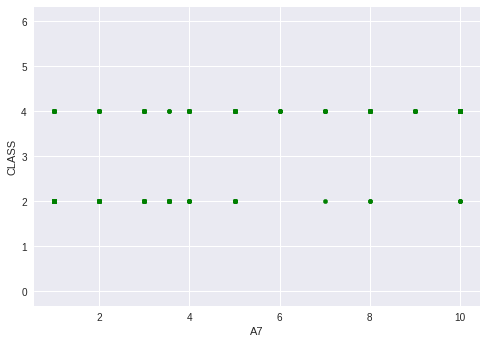

The P-Value of A8 and Scn is: 0.11268426133600587
The Corr value of A8 and Scn is: -0.0600505326950809
The P-Value of A8 and A2 is: 1.4660953363080153e-58
The Corr value of A8 and A2 is: 0.5584281622853957
The P-Value of A8 and A3 is: 2.967643454111043e-130
The Corr value of A8 and A3 is: 0.755720981100574


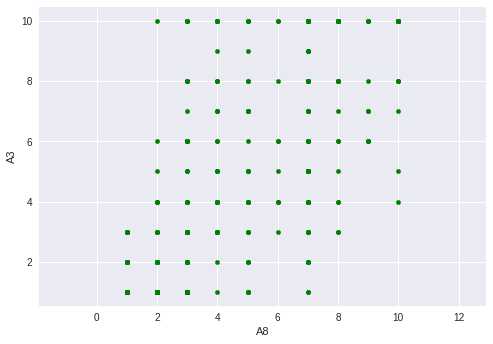

The P-Value of A8 and A4 is: 3.54729196632069e-120
The Corr value of A8 and A4 is: 0.7359484540232973
The P-Value of A8 and A5 is: 4.7348851617234485e-91
The Corr value of A8 and A5 is: 0.6667153262640533
The P-Value of A8 and A6 is: 2.7551337572423012e-74
The Corr value of A8 and A6 is: 0.616101840871849
The P-Value of A8 and A7 is: 1.8763699110903885e-94
The Corr value of A8 and A7 is: 0.6758955922673798
The P-Value of A8 and A8 is: 0.0
The Corr value of A8 and A8 is: 1.0
The P-Value of A8 and A9 is: 9.541931568777619e-91
The Corr value of A8 and A9 is: 0.6658778094254387
The P-Value of A8 and A10 is: 7.194434914929287e-21
The Corr value of A8 and A10 is: 0.34416949626585297
The P-Value of A8 and CLASS is: 9.849140270229808e-131
The Corr value of A8 and CLASS is: 0.7566161463789062


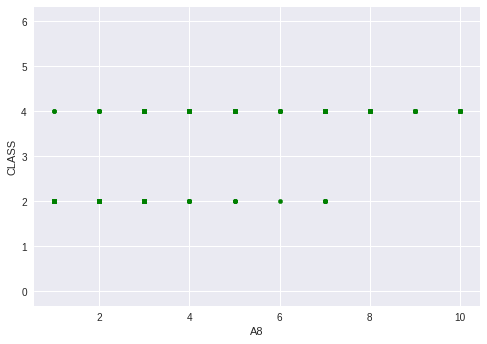

The P-Value of A9 and Scn is: 0.1690759509997611
The Corr value of A9 and Scn is: -0.05207195187406186
The P-Value of A9 and A2 is: 3.3582859804597887e-53
The Corr value of A9 and A2 is: 0.5358345492129774
The P-Value of A9 and A3 is: 5.396741131519736e-114
The Corr value of A9 and A3 is: 0.722864821906358
The P-Value of A9 and A4 is: 1.945780906902607e-112
The Corr value of A9 and A4 is: 0.7194463169532811
The P-Value of A9 and A5 is: 1.567472150235757e-70
The Corr value of A9 and A5 is: 0.603352412216761
The P-Value of A9 and A6 is: 3.158942080735435e-78
The Corr value of A9 and A6 is: 0.6288806855890917
The P-Value of A9 and A7 is: 2.221607668150944e-63
The Corr value of A9 and A7 is: 0.5773617697706416
The P-Value of A9 and A8 is: 9.541931568777619e-91
The Corr value of A9 and A8 is: 0.6658778094254387
The P-Value of A9 and A9 is: 0.0
The Corr value of A9 and A9 is: 1.0
The P-Value of A9 and A10 is: 1.4712048504309153e-32
The Corr value of A9 and A10 is: 0.42833574935357505
The P-V

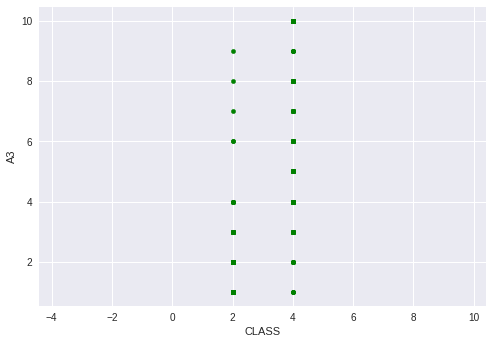

The P-Value of CLASS and A4 is: 2.9456211578465458e-170
The Corr value of CLASS and A4 is: 0.8189337394205257


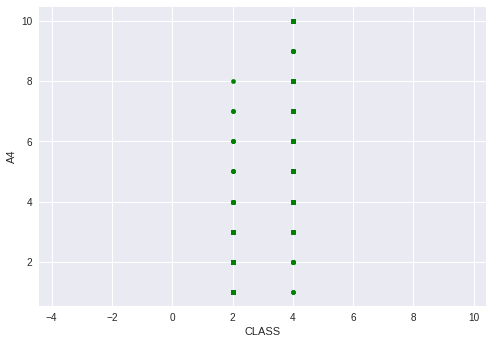

The P-Value of CLASS and A5 is: 1.1097566828535182e-102
The Corr value of CLASS and A5 is: 0.6968002062857466
The P-Value of CLASS and A6 is: 4.346160495522158e-97
The Corr value of CLASS and A6 is: 0.682784530093866
The P-Value of CLASS and A7 is: 4.1890044636786865e-168
The Corr value of CLASS and A7 is: 0.8160499264435995


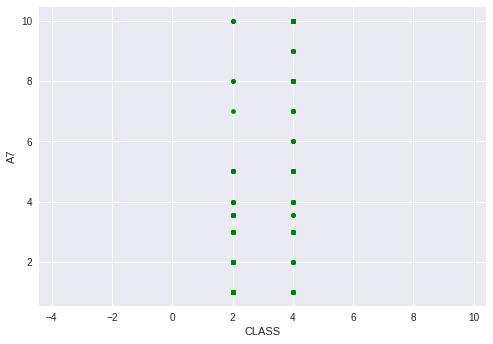

The P-Value of CLASS and A8 is: 9.849140270229808e-131
The Corr value of CLASS and A8 is: 0.7566161463789062


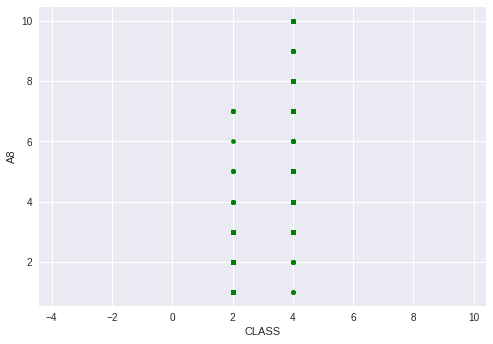

The P-Value of CLASS and A9 is: 3.124155254339221e-109
The Corr value of CLASS and A9 is: 0.7122436220251233
The P-Value of CLASS and A10 is: 9.682098004464413e-32
The Corr value of CLASS and A10 is: 0.4231702567952441
The P-Value of CLASS and CLASS is: 0.0
The Corr value of CLASS and CLASS is: 1.0


In [37]:
# Plot histograms for attributes A2 to A10 (nine histograms)
index_A2 = list(df.columns).index('A2')
index_A10 = list(df.columns).index('A10') + 1

# Turn grid off in histograms 
hist = df.iloc[:, index_A2:index_A10].hist(bins=20, color="g", alpha=0.5, grid=False)

# Adjust layout to fit better
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.show()

# Draw a bar plot for CLASS to see counts of benign and malignant values 
df.groupby('CLASS')['CLASS'].count().plot.bar()
plt.title('Benign and Malignant Class Counts')
plt.xlabel('Class (2 for benign, 4 for malignant)')
plt.ylabel('Totals')
plt.show()

# Draw a scatterplot of any two columns

# 1. Bare and Normal Nuclei
df.plot.scatter(x='A7', y='A9', c='Green')
plt.title('Bare and Normal Nuclei')
plt.xlabel('Bare Nuclei (A7)')
plt.ylabel('Normal Nuclei (A9)')
plt.axis('equal')
plt.show()

# 2. Clump Thickness and Marginal Adhesion
# df.plot.scatter(x='A2', y='A5', c='green')
plt.scatter(df['A2'], df['A5'])
plt.title('Clump Thickness and Marginal Adhesion')
plt.xlabel('Clump Thickness (A2)')
plt.ylabel('Marginal Adhesion (A5)')
plt.axis('equal')
plt.show()

# TEST CODE
# FIND SOME INTERESTING CLUSTERS
from scipy.stats import pearsonr
for column1 in column_names:
  for column2 in column_names:
    correlation, pvalue = pearsonr(df[column1], df[column2])
    print('The P-Value of {0} and {1} is: {2}'.format(column1, column2, pvalue))
    print('The Corr value of {0} and {1} is: {2}'.format(column1, column2, correlation))
    if(abs(correlation) > 0.75 and abs(correlation) < 1.0 and abs(pvalue) <  0.05): 
      df.plot.scatter(x=column1, y=column2, c='green')
      plt.xlabel(column1)
      plt.ylabel(column2)
      plt.axis('equal')
      plt.show()
      
# A3 AND A4 look interesting
# A8 AND A3 look interesting


#### SUMMARY

Summarize by reporting which values might need standardization in the future (too much variation) and any other observations that you may discover as a Data Scientist.
